## SC1003 Mini Project
## Name, Matriculation Number, Email 
# Yu Dong En, U2421329F, YUDO0002@e.ntu.edu.sg 
# Yee Rong Kun, U2410985E, yeer0002@e.ntu.edu.sg 
# Zhang Rui Tao, U2423321G, rzhang045@e.ntu.edu.sg 
# Yong Ming Xuan, U2420697J, YONG0275@e.ntu.edu.sg

# Problem Analysis

### As stated, we should group students based on these 3 factors:
1. School Affiliation: To ensure a mix of knowledge and skills, no team should have a
majority of students from the same school.
2. Gender: To promote gender diversity, no team should have a majority of students
from the same gender.
3. Current CGPA: To balance academic performance, teams should not consist
predominantly of students with very high or very low CGPAs.

#### Our goal should be to create balanced, diverse groups that foster an inclusive learning environment 

### Our interpretation of these factors is(Ranked in order):
1. The team should not have a single school be the majority.
2. The team should not have a overwhelming majority of 1 Gender.(3M2F or 2M3F are not majority, 4M1F is majority)
3. The cGPA of the team should be as close to the average as possible, preferably within 1 Standard Deviation.

We decided to let 1 and 2 be the more important requirements

### We are going to implement the advanced requirement of having any group-size between 4-10
There is no need to show a Basic/Advanced algorithim as the algorithim is the same.
We decided to handle unfinished groups(50/4 = 12R2), by ignroing the remainder of students not grouped. 
Putting these ungrouped people into their own special group is a simple fix, however.

In [1]:
#Dynamic value for extra marks!
while True:
    GROUPSIZE = int(input("Input a number between 4-10: "))
    if 4 <= GROUPSIZE and GROUPSIZE <= 10:
        break;
    else:
        print("Error! Groupsize not allowed!")

Input a number between 4-10:  5


# Data Analysis(Ungrouped)

### The dataset contains 6000 students split into 120 tutorial groups

### These are the columns(with comments):
#### Tutorial Group:.
#### Student ID: Unique for each student.
#### School: Set amount of schools.
#### Name:.
#### Gender: Either Male/Female.
#### CGPA:.



## We will now load data from the CSV file to do some preliminary Data Analysis
#### We will do this in a function.
This is for abstraction and readability which follows <b>Computational Thinking</b> principles.<br> 

The data is in a Comma Seperated Values format like so:<br>
G-1, 1330, NIE, Nguyen Van Sam, Male, 3.85<br>
Everything here can be loaded as a string except for the last value which should be loaded as a float.<br>
Therefore, as when we load the data in, everything is a string, we have to change it from a string to a float.

### Pattern Recognition
#### Pattern recognition is a <b>Computational Thinking</b> cornerstone that can be used to solve complex problems more easily.
Here, we need to remove the headers to read the file properly. We saw a pattern that the header is the only row that starts with a `T`.<br>
We simply opted to read every row that does not start with a `T`.


### Time Complexity
<b>O(n)</b><br>
Let n be the amount of students in the file. <br>Complexity is O(n) as complexity increases linearly due to the single for loop.

### Pseudo Code
    FUNCTION readCSV
        CREATE totalStudentArray
        OPEN file
            FOR each line in file
                IF the line is not a header
                    SPLIT line into information using the commas
                    CONCATENATE the information into a single array
                    CONVERT the cGPA to a float value from a string
                    APPEND the single array into total student array
        CLOSE file
        RETURN totalStudentArray

In [ ]:
# This loads all the information from records.csv into a array so we can manipulate it
def readCSV():
    studentList = [] 

    try:
        with open('records.csv', newline='') as csvfile:
            for line in csvfile:
                if line[0][0] != "T":#This is to prevent reading the header, as the First letter in the header is a T
                    studentInformation = line.split('\r\n')[0].split(",")
            
                    studentInformation[-1] = float(studentInformation[-1])#Handles Changing cGPA to float value for easier parsing later
            
                    studentList.append(studentInformation)
    except IOError as error:
        print("File read Error")
            
    csvfile.close()
    
    return studentList

In [3]:
studentList = readCSV()

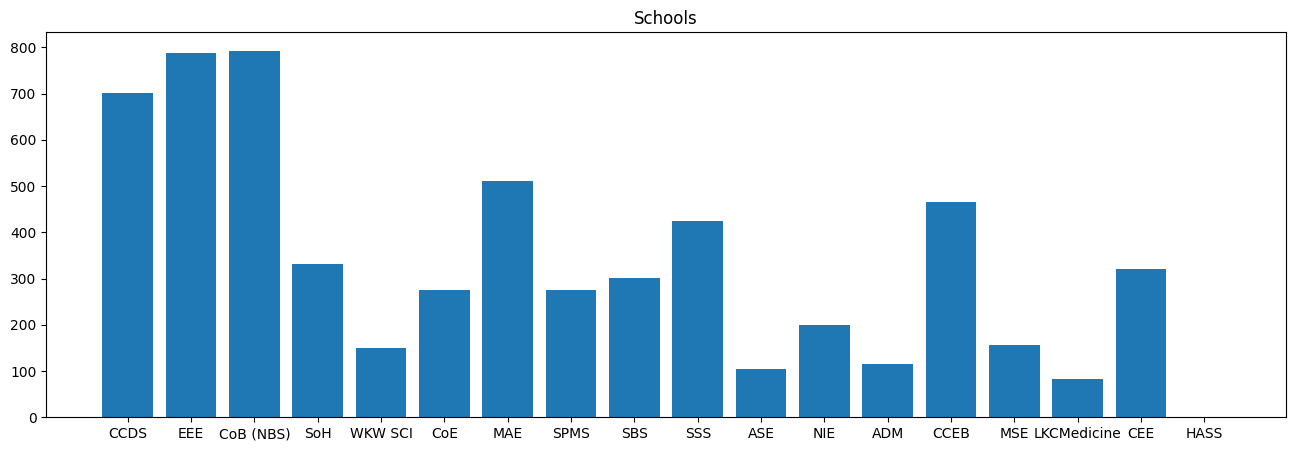

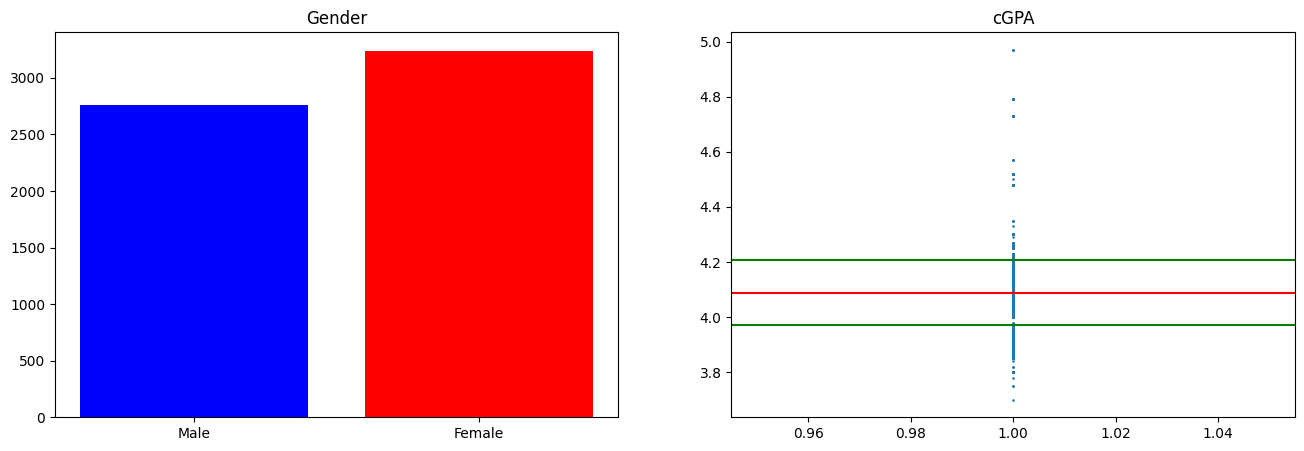

Mean cGPA: 4.088658333333333
Variance cGPA: 0.014031616597222225
Standard Deviation cGPA: 0.11845512482464499


In [4]:
#average
import math
import matplotlib.pyplot as plt

schoolFig, schoolAx = plt.subplots(figsize=(16, 5), dpi=100)
genderAndGpaFig, genderAndGpaAx = plt.subplots(nrows=1, ncols=2, figsize=(16, 5), dpi=100)

gpaArray = []
schoolDict = dict()
genderDict = dict()

for x in studentList:
    #Here we want to populate each individual data structure with their respective value
    
    gpaArray.append(float(x[-1]))
    
    school = x[2]
    gender = x[-2] 
    
    if school not in schoolDict:
        schoolDict[school] = 1
    else:
        schoolDict[school] = schoolDict[school] + 1
        
    if gender not in genderDict:
        genderDict[gender] = 1
    else:
        genderDict[gender] =  genderDict[gender] + 1   


genderAndGpaAx[0].bar(list(genderDict.keys()),genderDict.values(),color=["b","r"])#Plot the Gender in a bar graph,seperate colours
genderAndGpaAx[0].set_title("Gender")

meanGPA = sum(gpaArray)/len(gpaArray) #Mean using the average formula

varGPA  = sum(pow(x-meanGPA,2) for x in gpaArray) / len(gpaArray)  # variance

stdGPA  = math.sqrt(varGPA)  # standard deviation

genderAndGpaAx[1].set_title("cGPA")
genderAndGpaAx[1].scatter([1]*len(gpaArray),gpaArray,s=0.75)
genderAndGpaAx[1].axhline(meanGPA,color="r")#Plot Average
genderAndGpaAx[1].axhline(meanGPA-stdGPA,color="g")#Plot 1SD
genderAndGpaAx[1].axhline(meanGPA+stdGPA,color="g")#Plot -1SD

schoolAx.set_title("Schools")
schoolAx.bar(list(schoolDict.keys()),schoolDict.values())#Plot the school Data in a bar graph, seperate colours

plt.show()

print("Mean cGPA:",meanGPA)
print("Variance cGPA:",varGPA)
print("Standard Deviation cGPA:",stdGPA)

## Observations from the graphs: 
#### There are more females than males in this data set, so there are going to be some groups with a female majority. 
#### 3 Schools(CCDS,EEE,CoB(NBS)) make up almost half of the schools, so there might be some groups with majority in those schools. 
#### The Average is 4.088658333333333, Standard Deviation is 0.11845512482464499. 

# Problem Decomposition

#### 1) Read the list from the csv
#### 2) Seperate the students into tutorial groups
#### 3) Determine the best student based on the group's cGPA
        -We can do this by sorting the tutorial group, and alternating between the bottom and top
        -If the groupsize specified is odd, we let the last student be chosen from the middle
#### 4) Determine the best student based on the group's Gender
        -We can do this by checking whether the selected student's Gender is in the majority
#### 5) Determine the best student based on the group's Schools
        -We can do this by checking whether the selected student's School is in the majority
#### 6) Add student into the group
#### 7) Group those students together into a new grouped list
#### 8) Create a new csv file
#### 9) Write the new list into the new csv

![title](Assets/flowchart.png)

### We then started creating functions to modularize and simplify the code. 
Using functions aligns with <b>Computational Thinking</b> concepts such as Abstraction. It is useful for Divide and Conquer problem solving, and Simplification and Readability. Due to these benefits and our use case, we will be using functions heavily.

#### We first created the function that groups all of the students into their respective tutorial groups
#### This works by simply iterating over each student, checking if the previous student has a different tutorial group
#### If it is different, a new array representing a new tutorial group is created.

Do note this only works if students that are grouped together by tutorial group in the file.

### Time Complexity
<b>O(n)</b><br>
Let n be the amount of students.<br> Complexity is O(n) as complexity increases linearly due to the single for loop.

### Pseudo Code
    FUNCTION studentGrouping(studentList)

        SET tutorialList = []

        FOR each student in studentList:
            IF previous student's group is not the same as the current student's group
                CREATE new group
                APPEND group to tutorialList
            
            APPEND student to last group in tutorialList

        RETURN tutorialList

In [5]:
def studentGrouping(studentList):
    
    tutorialList = []

    #This assumes the csv file is grouped by tutorial group already(which it is)
    #Seperate students into tutorial groups(arrays)
    #Seperate by checking the previous student's tutorial group, if different, create new tutorial group(array)
    #This allows for easier manipulation
    for i in range(0,len(studentList)):
        
        #if the current item(Tutorial Group) in the student array is not the same as the previous, we create a new array in the tutorial list
        if(studentList[i][0] != studentList[i-1][0]):
            tutorialList.append([])

        #We then add the student to the last array which the current group
        tutorialList[-1].append(studentList[i])
        
    return tutorialList

#### We will run this code now to sort group the students for further analysis

In [22]:
tutorialList = studentGrouping(studentList)

# Data Analysis(Grouped)

#### Now that we have grouped all 6000 students into 120 tutorial groups. We can do some analysis of the tutorial groups.
We can try to predict, based on the composition of gender and school, which tutorial groups might have groups that will not fufill certain requirements.

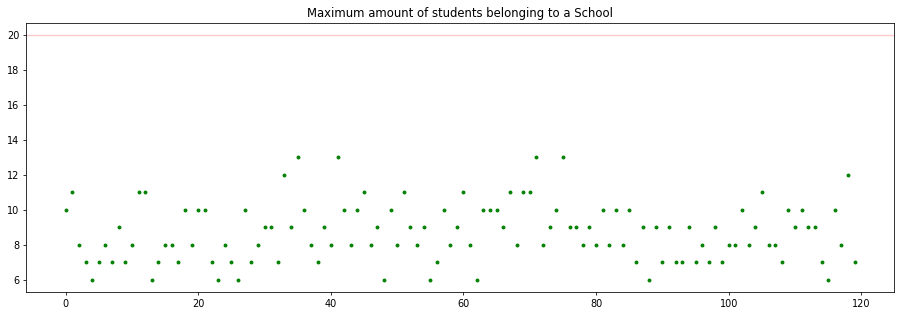

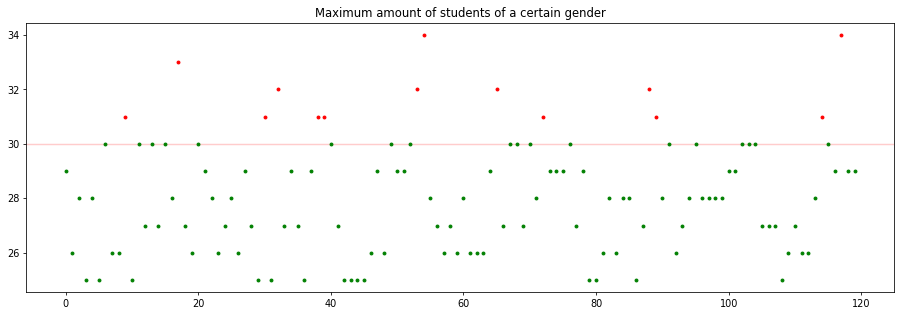

There will be at least 1 group in 46 - 50 that will not meet the gender requirement
There will be at least 2 group in 86 - 90 that will not meet the gender requirement
There will be at least 1 group in 151 - 155 that will not meet the gender requirement
There will be at least 1 group in 161 - 165 that will not meet the gender requirement
There will be at least 1 group in 191 - 195 that will not meet the gender requirement
There will be at least 1 group in 196 - 200 that will not meet the gender requirement
There will be at least 1 group in 266 - 270 that will not meet the gender requirement
There will be at least 2 group in 271 - 275 that will not meet the gender requirement
There will be at least 1 group in 326 - 330 that will not meet the gender requirement
There will be at least 1 group in 361 - 365 that will not meet the gender requirement
There will be at least 1 group in 441 - 445 that will not meet the gender requirement
There will be at least 1 group in 446 - 450 that will not 

In [7]:
schoolFig, schoolAx = plt.subplots(figsize=(16, 5), dpi=70)
genderFig, genderAx = plt.subplots(figsize=(16, 5), dpi=70)

schoolArr = []
genderArr = []

for y in tutorialList:
    #Here we want to populate each individual data structure with their respective value
    schoolDict = dict()
    genderDict = dict()
    
    for x in y:
        school = x[2]
        gender = x[-2]
    
        if school not in schoolDict:
            schoolDict[school] = 1
        else:
            schoolDict[school] = 1 + schoolDict[school]
        
        if gender not in genderDict:
            genderDict[gender] = 1
        else:
            genderDict[gender] = 1 + genderDict[gender] 

    schoolArr.append(schoolDict)
    genderArr.append(genderDict)

#We want to calculate whats the maximum amount of students that can be of a certain school/gender 
#without making any group not meet the respective requirements
maxGender = math.ceil(GROUPSIZE/2) * (50/GROUPSIZE) 
maxSchool = int(GROUPSIZE/2) * (50/GROUPSIZE)

genderAx.set_title("Maximum amount of students of a certain gender")
genderAx.axhline(maxGender,color="r",alpha=0.2)#Plot Max

schoolAx.set_title("Maximum amount of students belonging to a School")
schoolAx.axhline(maxSchool,color="r",alpha=0.2)#Plot Max

genderMaj = []
schoolMaj = []

genderMajGroups = []
schoolMajGroups = []

for x in range(len(schoolArr)):#Same length as genderArr
    if max(genderArr[x].values()) > maxGender: #If the highest number of students belonging to a certain gender is higher than the previous established limit    
        genderAx.plot(x,max(genderArr[x].values()),"ro",markersize=3)
        genderMaj.append(x)
        genderMajGroups.append(#Here we append the minimum amount of groups that will not meet the requirements due to the amount of students
            math.ceil((max(genderArr[x].values()) - maxGender)/(GROUPSIZE - math.ceil(GROUPSIZE/2)))
        )
    else:
        genderAx.plot(x,max(genderArr[x].values()),"go",markersize=3)

        
    if max(schoolArr[x].values()) > maxSchool: #If the highest number of students belonging to a certain school is higher than the previous established limit         
        schoolAx.plot(x,max(schoolArr[x].values()),"ro",markersize=3)
        schoolMaj.append(x)
        schoolMajGroups.append(#Here we append the minimum amount of groups that will not meet the requirements due to the amount of students
            math.ceil((max(schoolArr[x].values()) - maxSchool)/(GROUPSIZE - math.ceil(GROUPSIZE/2)))
        )
    else:
        schoolAx.plot(x,max(schoolArr[x].values()),"go",markersize=3)

plt.show()

for x in range(len(schoolMaj)):
    print("There will be at least",schoolMajGroups[x],"group in",(schoolMaj[x]*5)+1,"-",(schoolMaj[x]*5)+5,"that will not meet the school requirement")
    
for x in range(len(genderMaj)):
    print("There will be at least",genderMajGroups[x],"group in",(genderMaj[x]*5)+1,"-",(genderMaj[x]*5)+5,"that will not meet the gender requirement")

## Observations from the graphs: 
#### We can see that from our prediction, there will be no groups that will not meet the school requirement.
#### We can also see that there will be 17 groups that will not meet the gender requirement as listed above.
#### Note that this is simply a prediction, the result may include more groups which do not meet the requirement vary due to how the algortihim groups students around.

## We then created the function that adds the selected student's info into the dictionary which holds all of the info of the students inside the group.

#### This function simplifies adding student information to the dictionary.
#### If we were to try and increment a key:value pair that doesnt exist, it will throw an error
#### therefore, we need to create a key and set the value to 1

### Time complexity
<b>O(1)</b>. There is just 2 comparisons in the function, therefore its a constant complexity.

### Pseudo Code
    FUNCTION enterInfoIntoDictionary(studentInfo,genderSchoolDict)
        SET student_school = studentInfo's school 
        SET student_gender = studentInfo's gender
        
        IF student_school is in dictionary:
            INCREMENT the school_key by 1 in the dictionary 
        ELSE:
            CREATE a new school_key using the school element of student_information and set the value to be 1 
        
        IF student_gender is in dictionary: 
            INCREMENT the gender_key by 1 in the dictionary 
        ELSE:
            CREATE a new gender_key using the gender element of student_information and set the value to be 1
            
        RETURN genderSchoolDict

In [8]:
#Enters Selected Student Info into Dictionary, then return it
#This allows us to track and easily reference info of students have selected.
def enterInfoIntoDictionary(studentInfo,genderSchoolDict):
    if studentInfo[2] in genderSchoolDict["School"]:#If theres <school name> in the dictionary's keys
        genderSchoolDict["School"][studentInfo[2]] = genderSchoolDict["School"][studentInfo[2]] + 1
        #We add to it
    else:
        genderSchoolDict["School"][studentInfo[2]] = 1
        #Otherwise we create a new key and give it a value of 1

    if studentInfo[4] in genderSchoolDict["Gender"]:#If theres <gender> in the dictionary's keys
        genderSchoolDict["Gender"][studentInfo[4]] = genderSchoolDict["Gender"][studentInfo[4]] + 1
        #We add to it
    else:
        genderSchoolDict["Gender"][studentInfo[4]] = 1
        #Otherwise we create a new key and give it a value of 1

    return genderSchoolDict

## To facilitate the next function, we need to create a sorting function to sort the cGPA of all the students in a tutorial group. 
#### We will call this function on the whole tutorialGroup before we choose the student based on their cGPA.
#### We will be using our version of quick sort to sort this array.

#### Our version of quick sort is a divide and conquer type algorithim, so we implemented it as a recursive function.<br>

#### We first select the last elements in the array as the pivot, we then group the rest of the elements into their respective arrays.
If the selected element's GPA is less than the pivot's, we will move the element to a new array named left.<br>
If the selected element's GPA is equal to the pivot's, we will move the element to a new array named equal.<br>
If the selected element's GPA is more than the pivot's, we will move the element to a new array named right.<br>

#### We then run a quick sort recursively on both left and right arrays, which will run until the array in the function has less than or equal to 1 elements. We can then concatentate the 3 arrays, then return them.<br>

#### When everything is sorted, the sorted array is returned.<br>

#### The GIF below shows a similiar demonstration, note that the pivot here is random.

![title](Assets/QuickSort.gif)

### Time Complexity
Let n be the amount of students in the tutorial group.

Quicksort has the best time complexity out of all the sorting algorithims. This is a large reason why we decided to use it over other sorting methods 
such as Bubblesort etc.<br>

 <b>Best Case: O(Log n)</b> <br> Only when the pivot selected splits the array evenly into 2 arrays. This will then continue so recursive step processes half of the remaining elements, leading to a logarithmic depth of recursion (log n)<br>
 <b>Average Case:O(Log n)</b> <br> This is because it is reasonable that even in an average case, the algorithim will split the array into 2 reasonably even halves.<br> 
 <b>Worst Case: O(n^2)</b> <br> This happens when the array is already sorted. The pivot would constantly pick the largest or smallest number, therefore causing one array to be empty, while the other holds every number. This does not play into the advantages of quickSort.

### Pseudo Code
    FUNCTION quickSort(arr):
        IF array has 0 or 1 elements:
            RETURN arr  
            
        SET pivot = last element of arr

        CREATE empty arrays left, equal, right

        FOR each element in arr:
            IF element's GPA less than pivot's GPA:
                ADD element to left
            ELSE IF element's GPA equal to pivot's GPA:
                ADD element to equal
            ELSE:
                ADD element to right

        RETURN quickSort(left) + equal + quickSort(right) 

In [9]:
def quickSort(tutorialGroup):
    #If we split it up to 1 or 0 elements, return it back as its "sorted"!
    if len(tutorialGroup) <= 1:
        return tutorialGroup
    
    # Choose the last element as the pivot
    pivot = tutorialGroup[-1]

    # Split array into 3.
    # - `left`: Element < pivot
    # - `equal`: Element == pivot
    # - `right`: Element >pivot
    
    left = []
    equal = []
    right = []

    #This part sorts each element into their respective arrays
    for student in tutorialGroup:
        if student[-1] < pivot[-1]: 
            left.append(student)
        elif student[-1] == pivot[-1]:
            equal.append(student)
        else:
            right.append(student)

    # We will call this function recursively to sort the left and right arrays
    return quickSort(left) + equal + quickSort(right)

## We then created a function to select the cGPA of student
### Pattern recognition
We recognized that alternating between picking the top and bottom students would give a good estimation of the tutorial group's average as those with predominately high and low cGPA's will average themselves out in the group.

#### We then decided on an algorithim which takes the top and bottom students in the array.

If the case where we have an odd groupsize, the last student will have no one to balance themselves against, so we pick the middle of the array, which gets the student which is closest to the average.

![title](Assets/cGPA-Selection.gif)

### Time complexity
<b>O(1)</b><br>
This is simply a comparison function that returns a number, therefore, complexity is just a constant O(1).

### Pseudo Code
    FUNCTION cGPASelection(pointer,tutorialGroupLength)
        IF last in group and not even
            RETURN middle of the array(index)
        ELSE IF odd
            RETURN bottom of array(index)
        ELSE
            RETURN top of array(index)

In [10]:
#This chooses the cGPA of the student depending on the pointer
def cgpaSelection(pointer,tutorialGroupLength):
    
        #if it is the last member
        if y % GROUPSIZE == GROUPSIZE-1 and not pointer % 2:
            return int(tutorialGroupLength/2)
            
        #if it is odd
        #we want to pick from the bottom
        elif pointer % 2:
            return -1

        #if it is even  
        #we want to pick from the top
        else:
            return 0 

## We then need a function to check if the student's school and gender is not in the majority of the group
#### A student's School and Gender can either be in the majority or not be in the majority
#### If the student does not have a school or gender in the majority, 
this student is the highest priority as their inclusion adds to the diversity of the team. We will consider this student "Valid".

#### If the student has just one in the majority,
this student will be considered as a "Second Choice" as their inclusion only makes 1 aspect of the group more diverse. 

#### If the student has both in the majority, 
this student will be considered "Invalid" as their inclusion in the group does not make the group more diverse.

#### Time complexity
<b>O(1)</b><br>
This is simply a comparison function, therefore, complexity is just O(1).

## Pseudo Code
    FUNCTION checkValidityOfStudent(tutorialGroup,pointer,genderSchoolDict)
        SET schoolValid = True
        SET genderValid = True
    
        IF school from student_information exceeds the majority number of same school in the same group:
            SET schoolValid = false
        IF gender from student_information exceeds the majority number of same gender in the same group:
            SET genderValid = false

        IF schoolValid and genderValid are both true:
            RETURN "Valid"
        ELSE IF (schoolValid is True or genderValid is True):
            RETURN "SecondChoice"
        ELSE:
            RETURN "Invalid"

In [11]:
def checkValidityOfStudent(tutorialGroup,pointer,genderSchoolDict):
    #If gender valid but school valid?
    #We need a second best incase we cant find the best
    schoolValid = True
    genderValid = True

    #We are checking the validity before we add the student
    #Therefore the valid number to check against would be the 
    #number that makes the school/gender the majority - 1
    #>= is equivalent

    if(tutorialGroup[pointer][2] in genderSchoolDict["School"] and genderSchoolDict["School"][tutorialGroup[pointer][2]] >= int(GROUPSIZE/2)):#invalid due to School
        schoolValid = False

    if(tutorialGroup[pointer][4] in genderSchoolDict["Gender"] and genderSchoolDict["Gender"][tutorialGroup[pointer][4]] >= int(GROUPSIZE/2)):#invalid due to Gender
        genderValid = False
    
    if(schoolValid and genderValid):
        return "Valid"
    elif(schoolValid or genderValid):
        return "SecondChoice"
    else:
        return "Invalid"

### We then need a function to handle the iteration of students and handle what the checkValidityOfStudent returns.

### Algorithim Design
First, we check the student to ascertain their status \
Then, we have several actions that we need the algorithim to take depending on the status of the student.

#### If the student is valid, 
we return the student therefore add him to the group.

#### If the student is "second choice" and there is another "second choice" student,
we compare the two, the student which is closer to the student chosen at the start(Original Student) will become the "second choice".

#### If there isn't another "second choice" student,
the student will become the "second choice" student. 

We will then iterate to the next student

#### If the student is "invalid", 
we will iterate to the next student.

#### If no valid/second choice student has been found,
we will get the original pointer, since everything is invalid, we are going to get the student that is the closest to the target cGPA. 

When we iterate, we will start from the Original Student, and iterate to the left, then right. \
This allows us to stop iterating if we find a valid student. \
Starting from the Original Student ensures we only get the closest valid student to the Original Student which is imperative as they have the best fit cGPA.

#### We can conclude that this algorithim is a "greedy" algorithim, choosing what is best for the algorithim for its requirements at each stage.

#### Below is a table of Actions to be taken based on Status's

![title](Assets/Table.png)

#### Below are visualisations of situations and how the algorithim will handle it.

## Situation 1: Original Pointer is valid
#### Here, as the algorithim detects a valid student, they are returned and processed. 

![title](Assets/1.gif)

## Situation 2a: Original Pointer is invalid and a valid student is found.
#### Since the original student is invalid, we iterate to the next student.
#### As the algorithim detects the next student as a valid student, they are returned and processed. 

![title](Assets/2.gif)

## Situation 2b: Original Pointer is invalid and a valid student is found.
#### Since the original student is invalid, we iterate to the next student.
#### As the algorithim detects the next student as a invalid student, the algorithim iterates.
#### Until the algorithim detects a "second choice" student, as there is no existing second choice student, they are saved.
#### The algorithim continues iterating until it reaches the end of the array.
#### The algorithim then returns the "second choice" student.

![title](Assets/2b.gif)

## Situation 2c: Original Pointer is invalid and no valid student is found
#### Since the original student is invalid, we iterate to the next student.
#### As the algorithim detects the next student as a invalid student, the algorithim iterates.
#### The algorithim continues iterating until it reaches the end of the array.
#### The algorithim then returns the original student as every student is invalid.
#### Remember that the original student has the target cGPA

![title](Assets/2c.gif)

## Situation 2d: Original Pointer is invalid, part valid student is found, followed by valid student.
#### Since the original student is invalid, we iterate to the next student.
#### As the algorithim detects the next student as a "second choice" student, as there is no existing second choice student, they are saved.
#### The algorithim then iterates to the next student
#### As the algorithim detects the next student as a valid student, the algorithim returns the valid student. 
#### The second choice student is ignored.

![title](Assets/2d.gif)

## Situation 2e: Original Pointer is invalid, second choice student is found, followed by another second choice student.
#### Since the original student is invalid, we iterate to the next student.
#### As the algorithim detects the next student as a "second choice" student, as there is no existing second choice student, they are saved.
#### The algorithim then iterates to the next student
#### As the algorithim detects the next student as a "second choice" student, as there is an existing second choice student, we compare the difference between them and the original pointer
#### The student with the least difference is kept as the second choice student. The other second choice student is ignored.
#### The algorithim then iterates to the next student, then till the end as there is no other valid student.

![title](Assets/2e.gif)

## Situation 3a: Original Pointer is second choice, valid student is found.
#### Since the original student is second choice, as there is no existing second choice student, they are saved.
#### As the algorithim detects the next student as a invalid student, they are iterated over
#### The algorithim then detects a valid student, and will then return the valid student.
#### The second choice student is ignored.

![title](Assets/3a.gif)

## Situation 3b: Original Pointer is second choice, second choice student is found.
#### Since the original student is second choice, as there is no existing second choice student, they are saved.
#### As the algorithim detects the next student as a "second choice" student, as there is an existing second choice student, we compare the difference between them and the original pointer
#### The algorithim then iterates to the next student until the end as there is no valid student.
#### The algorithim will then return the second choice student.

![title](Assets/3b.gif)

## Situation 3c: Original Pointer is second choice, no valid students are found.
#### Since the original student is second choice, as there is no existing second choice student, they are saved.
#### The algorithim then iterates to the next student until the end as there is no valid student.
#### The algorithim will then return the second choice student.

![title](Assets/3c.gif)

### Pattern recognition
#### Since we iterate through a sorted list to search for a better student. 
We can therefore conclude that the further away a student is from another, the higher the difference in cGPA they will have. We used this in our algorithim to determine which student is more ideal to select. For example, if we have a student that is closer to the original pointer than another similar student, we can choose the closer student knowing that they have a closer cGPA to the original pointer than the other student.

### Time complexity
<b>O(n)</b><br>
Let n be the amount of students in the tutorial group.
As it just iterates over every student once, complexity is O(n)



### Pseudo Code
    FUNCTION handleValidityOfStudent(tutorialGroup,pointer,genderSchoolDict)
    
        SET second_choice = max positive integer
            
        FOR each student on the left of the OriginalPointer:
            SET status = checkValidityOfStudent(tutorialGroup,student,genderSchoolDict)

            IF status is "valid" 
                RETURN student_pointer 
            ELSE IF status is "second choice"
                IF student_pointer cGPA - OriginalPointer cGPA == second_choice cGPA - OriginalPointer cGPA
                    IF OriginalPointer cGPA - second_choice cGPA > OriginalPointer cGPA - student_pointer cGPA
                        SET second_choice as student_pointer cGPA and OriginalPointer cGPA
                ELSE IF student_pointer cGPA - OriginalPointer cGPA > second_choice cGPA - OriginalPointer cGPA
                    SET second_choice as student_pointer cGPA and OriginalPointer cGPA

        FOR each student on the right of the OriginalPointer:
            SET status = checkValidityOfStudent(tutorialGroup,student,genderSchoolDict)

            IF status is "valid" 
                RETURN student_pointer 
            ELSE IF status is "second choice"
                IF student_pointer cGPA - OriginalPointer cGPA == second_choice cGPA - OriginalPointer cGPA
                    IF OriginalPointer cGPA - second_choice cGPA > OriginalPointer cGPA - student_pointer cGPA
                        SET second_choice as student_pointer cGPA and OriginalPointer cGPA
                ELSE IF student_pointer cGPA - OriginalPointer cGPA > second_choice cGPA - OriginalPointer cGPA
                    SET second_choice as student_pointer cGPA and OriginalPointer cGPA

        IF second_choice is max positive integer
            RETURN OriginalPointer
        ELSE
            RETURN second_choice


In [23]:
import sys

def handleValidityOfStudent(tutorialGroup,pointer,genderSchoolDict):

    secondBest = sys.maxsize
    
    #This is here to calculate how many students we need to iterate over on each side
    
    #Normalize negative pointers
    #This is done so we can standardize working with one form of indexing(either positive or negative)
    if pointer < 0:
        itemsRight = abs(pointer + 1)
        pointer = len(tutorialGroup) + pointer
    else:
        itemsRight = len(tutorialGroup) - (pointer + 1)
    
    itemsLeft = pointer
    
    #Status can only be 3 values:
    #Valid=Both Gender and School is valid:
    #Here we want to just return the valid pointer
    
    #Invalid=Both Gender and School is invalid
    #Here we want to ignore the pointer and go next
    
    #SecondChoice=Either Gender and School is valid
    #Here we want to check with our current secondBest,
    
    #To determine whether we need to change our secondBest, we need to determine how far 
    #the current and incoming secondBest is from the pointer
    #for the current, we can just abs(secondBest-pointer) for the absolute distance(no neg values)
    #for the incoming, we can just use x as it represents how far the incoming secondBest is from the pointer

    #Checks all items on the left of the pointer along with the student that the pointer is point to
    for x in range(0, itemsLeft + 1):
        status = checkValidityOfStudent(tutorialGroup,pointer-x,genderSchoolDict)

        if status == "Valid":
            return pointer - x
        elif status == "SecondChoice":
            if abs(secondBest-pointer) == x:

                #In the case where the distances between the current and the incoming secondbest are the same
                #We will compare using their difference in cGPA, since the pointer's cGPA is the ideal one
                #We will then take the one with the least difference(most ideal)
                pointerCGPA = float(tutorialGroup[pointer][-1])
                currentSecondBestCGPA = float(tutorialGroup[secondBest][-1])
                incomingSecondBestCGPA = float(tutorialGroup[pointer-x][-1])

                if abs(pointerCGPA - currentSecondBestCGPA) > abs(pointerCGPA-incomingSecondBestCGPA):
                    secondBest = pointer - x

            elif abs(secondBest-pointer) > x:
                secondBest = pointer - x

    #Checks all items on the right of the pointer
    for x in range(1, itemsRight + 1):
        status = checkValidityOfStudent(tutorialGroup,pointer+x,genderSchoolDict)

        if status == "Valid":
            return pointer + x
        elif status == "SecondChoice":
            if abs(secondBest-pointer) == x:#Edge case

                #In the case where the distances between the current and the incoming secondbest are the same
                #We will compare using their difference in cGPA, since the pointer's cGPA is the ideal one
                #We will then take the one with the least difference(most ideal)
                pointerCGPA = float(tutorialGroup[pointer][-1])
                currentSecondBestCGPA = float(tutorialGroup[secondBest][-1])
                incomingSecondBestCGPA = float(tutorialGroup[pointer+x][-1])

                if abs(pointerCGPA - currentSecondBestCGPA) > abs(pointerCGPA-incomingSecondBestCGPA):
                    secondBest = pointer+x

            elif abs(secondBest-pointer) > x:
                secondBest = pointer+x
    
    #If we reach this point, we have not found a valid student

    if secondBest == sys.maxsize:
        #If we have not found the secondBest, we simply return the original pointer 
        #as there is not even 1 "half valid" student
        #therefore the best option would be to choose based on cGPA
        return pointer
    else:
        return secondBest

## We now need to process the student selected
#### We need to add the team number to the student, then add the student to the group.
#### Then we need to add the students info to the dictionary we use to check against incoming students.
#### Then we need remove the student from the unselected array of students.

## We will also handle iteration to the next student as well as the movement of groups in this code block

#### We will iterate through every tutorial group, 
#### then inside that tutorial group we will iterate over its length to make sure every student is grouped

### If the student was the last one in the group or the whole tutorial group:
#### We need to add the group to another array that stores grouped students
#### We also need to iterate the team number by 1 as it goes to the next group, we also need to reset the dictionary and array used to keep grouped students to its default values.

#### After the whole tutorial group has been sorted through, we will replace the empty tutorial group with the grouped tutorial group

### The Diagram below illustrates how this processing will work.

![title](Assets/4.gif)

### Time complexity
<b>Best: O(t * Log n). </b><br>
<b>Worst: O(t * n^2). </b><br>

Let t be the amount of tutorial groups, while n is the amount of students in the tutorial groups.<br>

The outer loop goes over the amount of tutorial groups, so O(t).<br>

The inner loop goes over the amount of students and the highest time complexity is handleValidityOfStudents which is O(n), so O(n).<br>

However, the quick sort is also inside the outer loop. In the best case it is O(Log n) and the worst case it is O(n^2) and happens every tutorial group. Therefore, the quick sort determines the time complexity inside the outerloop.<br> 

Therefore, complexity is O(t * Log n) in the best case and O(t * n^2) in the worst case.

### Pseudo Code
    INITIALIZE dictionary named currentGenderSchoolDict to track the gender and school counts of selected student.

    SET groupNumber to 1

    FOR each tutorial group in the tutorial list:
        SORT the tutorial group by CGPA using quickSort
    
        SET totalGroupList to an empty list to hold all the groups for this tutorial
        SET groupingList to an empty list to hold the current group being formed
    
        FOR each student in the tutorial group:

            SET pointer to the index of the student in the tutorialGroup
        
            SET studentPointer to the result of cgpaSelection(pointer,lengthOfTutorialGroup) function
        
            SET studentPointer to the result of handleValidityOfStudent(tutorialGroup, studentPointer, currentGenderSchoolDict)
        
            APPEND the group number to the student's data
        
            ADD the student to groupingList
        
            UPDATE currentGenderSchoolDict to the result of enterInfoIntoDictionary(student, currentGenderSchoolDict)
        
            REMOVE student from tutorialGroup
        
            IF a group has reached the maximum size (GROUPSIZE):
                ADD the current group to totalGroupList
                INCREMENT groupNumber by 1
                RESET the gender and school dictionary to default values
                RESET groupingList for the next group
        
            IF there are no more students left in the tutorial group:
                BREAK out of the loop
        
        REPLACE the original tutorial group in the tutorial list with the grouped version

In [24]:
#We use this dictionary to store information about the students already chosen in the group.
#This allows us an easy way to see how many times a certain school or gender has been selected
currentGenderSchoolDict = {
    "Gender":{},
    "School":{}
}
#This object looks like this
#{
# "Gender":{
#  Male:1,
#  Female:2
# },
# "School":{
#  School1:5
# }
#}


groupNumber = 1

for x in range(0,len(tutorialList)):
    tutorialGroup = quickSort(tutorialList[x])

    totalGroupList = []#This will hold all the groups in the tutorial class
    groupingList = []#This will hold the current group being modified
    
    for y in range(0,len(tutorialGroup)):#iterates every tutorial group

        #CGPA choosing process
        studentPointer = cgpaSelection(y,len(tutorialGroup))

        #Check if this student's school or gender is valid
        #If not, get the closest valid student
        studentPointer = handleValidityOfStudent(tutorialGroup,studentPointer,currentGenderSchoolDict)
        
        #Process the chosen student

        #Add the groupNumber to the student
        tutorialGroup[studentPointer].append(groupNumber)

        #Add it to the current group
        groupingList.append(tutorialGroup[studentPointer])
        
        #Add its information to the dictionary for comparison for next student
        currentGenderSchoolDict = enterInfoIntoDictionary(tutorialGroup[studentPointer],currentGenderSchoolDict)
        
        #Remove it from the tutorial group
        tutorialGroup.pop(studentPointer)

        #If we reach the last student in the student in the tutorial group or the last student in the group
        #we want to add the group to the total group list
        #we then reset all the important variables so we can repeat the process again
        if y % GROUPSIZE == GROUPSIZE-1:
            totalGroupList.append(groupingList)

            groupNumber = groupNumber+1
            
            currentGenderSchoolDict = {
                "Gender":{},
                "School":{}
            }
            
            groupingList = []
        #This handles if a group is unfinished but we run out students, we decided to just ignore this unfinished group,
        #if we want to keep this student, simply OR this if condition to the code block above
        if not len(tutorialGroup):
            break;
            
    #We then replace the ungrouped tutorial group with the grouped one
    tutorialList[x] = totalGroupList

## We then need to write the sorted groups to a new file
#### All the information is stored into the Tutorial Group Array, so we just need to create the file, write the headers, iterate through the students and join all the information into a csv format

#### Time complexity
<b>O(7 * t * n ). </b><br>
Let t be the amount of tutorial groups, while n is the amount of students in the tutorial group.<br>
7 is a constant as it is the different types of infromation students have.<br>
This function loops over every student's data and thus the time complexity is O(7 * t * n)

## Pseudo Code
    CREATE new file called new records.csv with write permission
    
    WRITE headers into file as the first row
    
    FOR every tutorialgroup: 
        FOR every group: 
            FOR every student:
                JOIN all the student information using commas
                WRITE the student information into the file 
                GO to next line

In [25]:
try:
    newCSVFile = open("newrecords.csv", "w")#Create a new file and give it write permission

    newCSVFile.write("Tutorial Group,Student ID,School,Name,Gender,CGPA,Team Assigned\n")#Headers
except IOError as error:
    print("File read Error")

for x in range(len(tutorialList)):
    for y in range(len(tutorialList[x])):
        for z in range(len(tutorialList[x][y])):
            newCSVFile.write(",".join(str(x) for x in tutorialList[x][y][z])+"\n")#Join everything in the array using commas

newCSVFile.close()

In [26]:
#average
import math
import statistics
import matplotlib.pyplot as plt    
import random

def analyzeFile(string):
    #This function analyzes the information and parses everything, then returns all useful information
    
    studentList = []

    #Read the file for parsing
    try:
        newCSVFile = open(str(string), "r")
        for line in newCSVFile:
            if line[0][0] != "T":
                studentList.append(line.split('\n')[0].split(","))
    except IOError as error:
        print("File read Error")

    newCSVFile.close()

    studentGrouping = []
    tutorialGrouping = []
    totalGPA = []

    for i in range(0,len(studentList)):
        totalGPA.append(float(studentList[i][-2]))
        
        if(studentList[i][-1] != studentList[i-1][-1]):
            studentGrouping.append([])
        studentGrouping[-1].append(studentList[i])
        
        if(studentList[i][0] != studentList[i-1][0]):
            tutorialGrouping.append([])
        tutorialGrouping[-1].append(studentList[i])

    
    totalMean = sum(totalGPA)/len(studentList)
    totalSTD = statistics.stdev(totalGPA)#We already calculated the standard deviation above, leaving this in for redundancy

    informationArray = []
    tutorialArray = []

    for x in tutorialGrouping:
        mean = sum(float(i[-2]) for i in x)/len(x)
        tutorialArray.append(mean)

    for x in studentGrouping:

        mean = sum(float(i[-2]) for i in x)/len(x)

        variance = sum(pow(float(i[-2])-mean,2) for i in x) / len(x)

        std = math.sqrt(variance)

        #Here we calculate and determine whether a group has a majority of gender or school
        genderDict = {
                "Male":0,
                "Female":0
            }

        schoolDict = dict()

        for i in x:
            if i[2] not in schoolDict:
                schoolDict[i[2]] = 1
            else:
                schoolDict[i[2]] = schoolDict[i[2]] + 1

            genderDict[i[-3]] = genderDict[i[-3]] + 1

        genderDict["Majority"] = False

        for z in genderDict.values():
            if GROUPSIZE%2:
                if z > int(GROUPSIZE/2)+1:
                    genderDict["Majority"] = True
            else:
                if z > int(GROUPSIZE/2):
                    genderDict["Majority"] = True

        schoolDict["Majority"] = False

        for z in schoolDict.values():
            if z > int(GROUPSIZE/2):
                schoolDict["Majority"] = True

        informationArray.append({
            "CGPA":
                {
                "Average": mean,
                "Variance": variance,
                "STD": std
                },
            "Gender":genderDict,
            "School":schoolDict
        })

    return informationArray,tutorialArray,totalMean,totalSTD


In [27]:
def showCharts(informationArray,tutorialArray,totalMean,totalSTD):

    cGPAFig, cGPAAx = plt.subplots(figsize=(16, 12), dpi=100)
    genderSchoolFig, genderSchoolAx = plt.subplots(nrows=1, ncols=2, figsize=(16, 6), dpi=100)
    totalFig,totalAx = plt.subplots(figsize=(16, 10), dpi=100)

    #This plots the cGPA graph
    for x in range(len(informationArray)):
        if x % int(50/GROUPSIZE) == 0 and not x/int(50/GROUPSIZE) >= len(tutorialArray):
            color=(random.uniform(0,1),random.uniform(0,1),random.uniform(0,1))#Change the colour as we changed to a new tutorial group
            cGPAAx.plot([x,x+9],[tutorialArray[int(x/int(50/GROUPSIZE))],tutorialArray[int(x/int(50/GROUPSIZE))]],color=color)#Plots the straight line
        cGPAAx.plot(x,informationArray[x]["CGPA"]["Average"],"o",markersize=1,color=color)


    cGPAAx.axhline(y = totalMean,color = 'r',alpha=0.1)#Mean
    cGPAAx.axhline(y = totalMean-totalSTD,color = 'g',alpha=0.1)#1SD
    cGPAAx.axhline(y = totalMean+totalSTD,color = 'g',alpha=0.1)#1SD

    cGPAAx.set_xlabel("Tutorial Groups")
    cGPAAx.set_ylabel("cGPA")
    cGPAAx.set_title("cGPA")
    cGPAAx.legend(["Average of the tutorial group","Average of the group"])

    #This plots the gender School graphs

    genderSchoolAx[0].set_title('School Majorities')
    genderSchoolAx[0].set_ylim([0,int(6000/GROUPSIZE)+100])

    nMajority = sum([not(x["School"]["Majority"]) if x["School"]["Majority"] else True for x in informationArray])
    majority = sum([x["School"]["Majority"] if x["School"]["Majority"] else False for x in informationArray])

    genderSchoolAx[0].bar(["Non-Majority School("+str(nMajority)+")","Majority School ("+str(majority)+")"],[nMajority,majority],color=["g","r"], width=0.2)

    genderSchoolAx[1].set_title('Gender Majorities')
    genderSchoolAx[1].set_ylim([0,int(6000/GROUPSIZE)+100])

    nMajority = sum([not(x["Gender"]["Majority"]) if x["Gender"]["Majority"] else True for x in informationArray])
    majority = sum([x["Gender"]["Majority"] if x["Gender"]["Majority"] else False for x in informationArray])

    genderSchoolAx[1].bar(["Non-Majority Gender ("+str(nMajority)+")","Majority Gender ("+str(majority)+")"],[nMajority,majority],color=["g","r"],width=0.2)

    #This handles the calculations for the requirements graph
    counter = [
        0,#Satisfies everything
        0,#Satisfies Gender and School
        0,#Satisfies cGPA and School
        0,#Satisifes cGPA and Gender
        0,#Satisfies cGPA only
        0,#Satisfies School only
        0,#Satisfies Gender only
        0,#Satisfies nothing
    ]
    
    for x in informationArray:
        arr = [False,False,False]
        if abs(totalMean - x["CGPA"]["Average"]) < totalSTD:
            arr[0] = True
        if not x["Gender"]["Majority"]:
            arr[1] = True
        if not x["School"]["Majority"]:
            arr[2] = True

        if arr[0] and arr[1] and arr[2]:
            counter[0] = counter[0] + 1
        elif arr[1] and arr[2] and not arr[0]:
            counter[1] = counter[1] + 1
        elif arr[0] and arr[2] and not arr[1]:
            counter[2] = counter[2] + 1
        elif arr[0] and arr[1] and not arr[2]:
            counter[3] = counter[3] + 1
        elif arr[0] and not arr[1] and not arr[2]:
            counter[4] = counter[4] + 1
        elif arr[2] and not arr[0] and not arr[1]:
            counter[5] = counter[5] + 1
        elif arr[1] and not arr[0] and not arr[2]:
            counter[6] = counter[6] + 1
        else:
            counter[7] = counter[7] + 1   
    
    totalAx.bar(["cGPA, Gender & School ("+str(counter[0])+")",
        "Gender & School("+str(counter[1])+")",
        "cGPA & School("+str(counter[2])+")",
        "cGPA & Gender("+str(counter[3])+")",
        "cGPA("+str(counter[4])+")",
        "School("+str(counter[5])+")",
        "Gender("+str(counter[6])+")",
        "Nothing("+str(counter[7])+")"],counter,color=[
        "g","y","y","y","r","r","r","r"
        ])

    totalAx.set_title('Number of groups who achieved requirements')
    totalAx.set_ylim([0,int(6000/GROUPSIZE)+100])
    
    plt.tight_layout()
    plt.show()

In [28]:
def printInformation(informationArray):
 
    print("Groups with Majority Schools: ")
    
    for x in range(len(informationArray)):
        if informationArray[x]["School"]["Majority"]:
            schools = list(informationArray[x]["School"].keys())
            values = list(informationArray[x]["School"].values())
            returnStr = ""
            for y in range(len(schools)):
                if schools[y] != "Majority":
                    returnStr = returnStr + schools[y] + ": "+str(values[y])+" "
            print("Group",str(x+1)+":",returnStr)

    print("\n Groups with Majority Gender: ")
    
    maleMajority = 0
    femaleMajority = 0
    
    for x in range(len(informationArray)):
        if informationArray[x]["Gender"]["Majority"]:
            genders = list(informationArray[x]["Gender"].keys())
            values = list(informationArray[x]["Gender"].values())
            returnStr = ""

            if(values[0] > values[1]):
                maleMajority = maleMajority + 1
            else:
                femaleMajority = femaleMajority + 1
            
            for y in range(len(values)):
                if genders[y] != "Majority":
                    returnStr = returnStr + genders[y] + ": "+str(values[y])+" "
            print("Group",str(x+1)+":",returnStr)

    print("Groups with Male Majority:",maleMajority,"Groups with Female Majority:",femaleMajority)

In [29]:
informationArray,tutorialArray,totalMean,totalSTD = analyzeFile("newrecords.csv")
showCharts(informationArray,tutorialArray,totalMean,totalSTD)

KeyError: '3.88'

# Results Analysis
### CGPA Chart
#### The chart has 2 faint green lines that represent 1 standard deviation away from the average, while the faint red line represents the average. The dots represent a group's average, then the straight horizontal lines represent a tutorial group's average. The groups and tutorial groups are color coded, the tutorial group also cover all the groups that are in it. 

We can see that all except for 7 groups, the cGPA of the groups are in range of 1 Standard Deviation around the Average. This means the groups are relatively average in cGPA. The groups within each tutorial group are spread evenly in terms of cGPA deviation too.

### School Chart
#### The chart represents how many groups have a majority school. For example, If a group of 5 has more than 2 "MAE" students, it is considered majority, represented in red while the non-majority is represented in green. 

We can see that only 9 groups have a school that is the majority. All of the other groups are diverse in terms of school.

### Gender Chart
#### The chart represents how many groups have a majority school. For example, If a group of 5 has more than 2 Female students, it is considered majority, represented in red while the non-majority is represented in green. . 

We can see that 107 groups have a gender that is in the majority. This means that around 8% of groups do not hit the diversity critera for gender.

### Requirements Chart
#### The chart represents how many groups have achieved a certain requirement. For example, If a group has only achieved the cGPA requirement, it will appear in red, in the cGPA bar.

We can see that 1082 groups have achieved all requirements. Only 5 groups have failed the gender and school requirements. As we can see here, the hardest requirement is indeed the Gender requirement. We can also see that the numbers given above match up with this chart.

#### 90% of all groups fufilled all requirements.
#### 99.5% of all groups fufilled at least 2 requirements.

In [19]:
printInformation(informationArray)

Groups with Majority Schools: 
Group 20: MAE: 3 CCEB: 2 
Group 100: CCEB: 3 SSS: 1 EEE: 1 
Group 280: EEE: 2 CCDS: 3 
Group 360: CoB (NBS): 3 EEE: 1 CEE: 1 
Group 390: MAE: 1 CoB (NBS): 1 CEE: 3 
Group 420: CoB (NBS): 3 MAE: 2 
Group 430: EEE: 4 WKW SCI: 1 
Group 760: CoB (NBS): 3 MAE: 1 CEE: 1 
Group 1010: SSS: 1 MAE: 3 SPMS: 1 

 Groups with Majority Gender: 
Group 10: Male: 1 Female: 4 
Group 40: Male: 4 Female: 1 
Group 50: Male: 0 Female: 5 
Group 70: Male: 1 Female: 4 
Group 90: Male: 1 Female: 4 
Group 100: Male: 0 Female: 5 
Group 120: Male: 0 Female: 5 
Group 139: Male: 0 Female: 5 
Group 140: Male: 0 Female: 5 
Group 150: Male: 4 Female: 1 
Group 159: Male: 1 Female: 4 
Group 160: Male: 0 Female: 5 
Group 170: Male: 1 Female: 4 
Group 179: Male: 0 Female: 5 
Group 180: Male: 0 Female: 5 
Group 190: Male: 1 Female: 4 
Group 209: Male: 1 Female: 4 
Group 210: Male: 0 Female: 5 
Group 220: Male: 5 Female: 0 
Group 230: Male: 0 Female: 5 
Group 260: Male: 0 Female: 5 
Group 270: 

### Groups with Majority
We can also see most of the groups with Schools/Gender majority occur at the last groups to be grouped at in the tutorial group.  This is consistent with the algorithim's behaviour as it will only accept non-diverse groups if there is no choice. 

We can also see that analyzed previously, we have more groups with Female Majority as compared to Male Majority. 88 Female majority groups as compared to 19 Male majority groups.

We can also see that we have at least than 17 groups with Majority gender as predicted.

# Algorithim evaluation

#### Our algorithim delivers 90% accuracy with all 3 of our requirements and 99.5% accuracy when dealing with this dataset. 
Most of the groups which do not fufill the requirements are the last few groups in the tutorial group, meaning the algorithim had no choice but to group them as such.

While our algorithim creates more groups with a majority gender than predicted, we can attribute this to our "greedy" algorithim. This simply means our algorithim is more balanced as creating a gender majority is relatively easy as 2 students being moved around can create 2 gender majority groups. 

If we wanted a more gender focused algorithim, it would sacrifice non gender requirements.

### Time Complexity
The time complexity of each function has been calculated. To determine the time complexity of this whole algorithim, we have to find the Biggest O Notation in the whole algorithim. This would be <b>O(n^2)</b> which is the worst case of the quicksort function. <br>However, if the worst case does not happen, the Big O of quicksort is O(Log n).<br>Therefore, the next biggest O notation would be <b>O(n)</b>.



# Challenges and Issues

#### A main problem was deciding how to balance all 3 requirements.
We ended up deciding on making cGPA the last as that is a range and has more room for error. We then made the gender and school requirements the top priorities.

#### We then faced the issue of Gender being hard to hit non-majority.
We recognized that this was a consequence of using a greedy algorithim not being able to look ahead. We can mitigate this by making gender play a bigger part in the selection. We could remove all of the gender that is the majority, select the cGPA and then find a student with a proper school.

#### We also had the issue of communication of how the algorithim functions.
The algorithim, once written, was hard to understand and explain. We decided to create GIFs, pseudo code and flowcharts to help explain the algorithim.

# Conclusion
#### In conclusion, 
After much data analysis, planning and flowcharting, we decided on a greedy grouping algorithim that can handle an output between 4-10. After planning, modularizing and running it, we parsed through the results, presented using matplotlib and achieved 90% accuracy with 3 requirements, 99.5% accuracy with 2 or more requirements with the algorithim. We can therefore conclude that the groups have been created in an inclusive and diverse manner.